In [ ]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sqlite3
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Connexion à la base de données
conn = sqlite3.connect('test_neg.db')
c = conn.cursor()

# Création de la table pour stocker les avis
c.execute('''CREATE TABLE IF NOT EXISTS avis
             (id INTEGER PRIMARY KEY, rating INTEGER, text TEXT)''')

# Prétraitement des avis
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

for filename in os.listdir('neg'):
    if filename.endswith('.txt'):
      
# Récupération de l'id et du rating à partir du nom de fichier
        id, rating = filename.split('_')
        id = int(id)
        rating = int(rating.split('.')[0])

# Lecture du fichier et prétraitement du texte
        with open(os.path.join('neg', filename), 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = word_tokenize(text.lower())
            words = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and not w in stop_words]
            processed_text = ' '.join(words)

# Insertion des informations dans la base de données
        c.execute("INSERT INTO avis VALUES (?, ?, ?)", (id, rating, processed_text))

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
# Connexion à la base de données
conn = sqlite3.connect('train.db')
c = conn.cursor()

#Création du data frame
df_train = pd.read_sql_query("SELECT * from avis", conn)

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

#Retirer des colonnes
df_train = df_train.drop('rowid', axis = 1)
df_train = df_train.drop('id', axis = 1)

#Valeurs dupliquées
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

#Valeurs manquantes
df_train.isnull().sum()

df_train

,rating,text
0,3,story man unnatural feeling pig start opening ...
1,9,bromwell high cartoon comedy ran time program ...
2,4,airport start brand new luxury plane loaded va...
3,8,homelessness houselessness george carlin state...
4,10,brilliant lesley ann warren best dramatic hobo...
...,...,...
24995,3,saw last night stockholm film festival one hug...
24996,1,film pick pound turn rather good century film ...
24997,8,christmas together actually came time raised j...
24998,1,one dumbest film ever seen rip nearly ever typ...


In [16]:
# Connexion à la base de données
conn = sqlite3.connect('test.db')
c = conn.cursor()

#Création du data frame
df_test = pd.read_sql_query("SELECT * from avis", conn)

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

#Retirer des colonnes
df_test = df_test.drop('rowid', axis = 1)
df_test = df_test.drop('id', axis = 1)

#Valeurs dupliquées
df_test.duplicated().sum()
df_test.drop_duplicates(inplace=True)

#Valeurs manquantes
df_test.isnull().sum()

df_test

,rating,text
0,10,went saw movie last night coaxed friend mine a...
1,2,costner dragged movie far longer necessary asi...
2,4,example majority action film generic boring re...
3,7,actor turned director bill paxton follows prom...
4,1,first hate moronic rapper act gun pressed fore...
...,...,...
24995,8,start edge love viewer transported striking wo...
24996,10,movie complexity subtlety make one short film ...
24997,3,four thing intrigued film firstly star carly p...
24998,4,david bryce comment nearby exceptionally well ...


In [15]:
# Connexion à la base de données
conn = sqlite3.connect('unsup.db')
c = conn.cursor()

#Création du data frame
df_unsup = pd.read_sql_query("SELECT * from avis", conn)

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

#Retirer des colonnes
df_unsup = df_unsup.drop('rowid', axis = 1)
df_unsup = df_unsup.drop('id', axis = 1)

#Valeurs dupliquées
df_unsup.duplicated().sum()
df_unsup.drop_duplicates(inplace=True)

#Valeurs manquantes
df_unsup.isnull().sum()

df_unsup

,rating,text
0,0,admit great majority film released say dozen m...
1,0,take low budget inexperienced actor doubling p...
2,0,everybody seen future right whether like movie...
3,0,doris day icon beauty singing acting warm voic...
4,0,series silly movie big year doris day year saw...
...,...,...
49995,0,delightfully awful made david giancola guy lon...
49996,0,watching time chaser obvious made bunch friend...
49997,0,beginning see member troma team company uwe bo...
49998,0,movie incredible ever since saw told wife see ...


<Axes: ylabel='Frequency'>

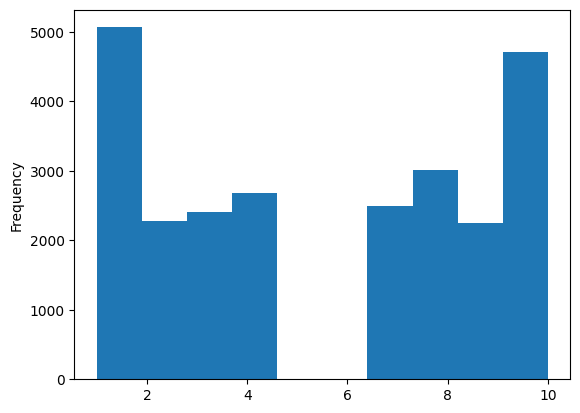

In [20]:
df_train['rating'].value_counts()
df_train['rating'].plot(kind='hist')